# Bounding boxes analysis
We will get a grasp on bounding boxes aspect ratios and area. This two factors will be useful during hyperparameters tuning.

In [8]:
import os
import pandas as pd
import numpy as np

# For this env variable to work, notebook **must** be run from environemnt where env variables were sourced
DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

bbox_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv'))

bbox_df = bbox_df.assign(Box=bbox_df['BoxesString'].str.split(';')).explode('Box').reset_index(drop=True)
bbox_df = bbox_df[bbox_df['Box'] != 'no_box']
box_to_columns = bbox_df['Box'].str.split(' ')
box_to_columns = list(zip(*box_to_columns))
bbox_df['x_min'], bbox_df['y_min'], bbox_df['x_max'], bbox_df['y_max'] = box_to_columns
bbox_df[['x_max', 'x_min', 'y_min', 'y_max']] = bbox_df[['x_max', 'x_min', 'y_min', 'y_max']].astype(int)
bbox_df

,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,99 692 160 764,99,692,160,764
1,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,641 27 697 115,641,27,697,115
2,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,935 978 1012 1020,935,978,1012,1020
3,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,377 834 463 890,377,834,463,890
4,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,654 797 696 837,654,797,696,837
...,...,...,...,...,...,...,...,...
163735,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,640 1000 700 1024,640,1000,700,1024
163736,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,365 988 450 1024,365,988,450,1024
163737,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,534 982 635 1023,534,982,635,1023
163738,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,608 921 820 999,608,921,820,999


In [9]:
bbox_df['Width'] = bbox_df['x_max'] - bbox_df['x_min']
bbox_df['Height'] = bbox_df['y_max'] - bbox_df['y_min']
bbox_df['AspectRatio'] = pd.Series()
bbox_df['AspectRatio'] = bbox_df['Width'] / bbox_df['Height']
bbox_df['Area'] = bbox_df['Height'] * bbox_df['Width']
bbox_df

/tmp/ipykernel_381452/1402152945.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bbox_df['AspectRatio'] = pd.Series()


,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max,Width,Height,AspectRatio,Area
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,99 692 160 764,99,692,160,764,61,72,0.847222,4392
1,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,641 27 697 115,641,27,697,115,56,88,0.636364,4928
2,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,935 978 1012 1020,935,978,1012,1020,77,42,1.833333,3234
3,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,377 834 463 890,377,834,463,890,86,56,1.535714,4816
4,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,654 797 696 837,654,797,696,837,42,40,1.050000,1680
...,...,...,...,...,...,...,...,...,...,...,...,...
163735,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,640 1000 700 1024,640,1000,700,1024,60,24,2.500000,1440
163736,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,365 988 450 1024,365,988,450,1024,85,36,2.361111,3060
163737,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,534 982 635 1023,534,982,635,1023,101,41,2.463415,4141
163738,de85de89b3969fc6eb97d0c83299ad725a52595bde4533...,98 0 158 41;0 0 42 49;0 78 26 143;324 86 374 1...,ULiège-GxABT_1,608 921 820 999,608,921,820,999,212,78,2.717949,16536


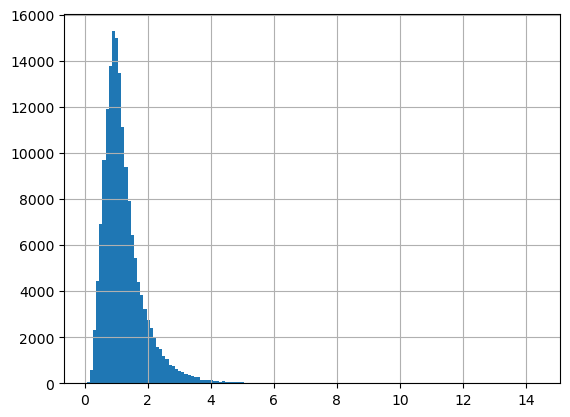

Median AspectRatio: 1.0808080808080809
Area median:  4914.0


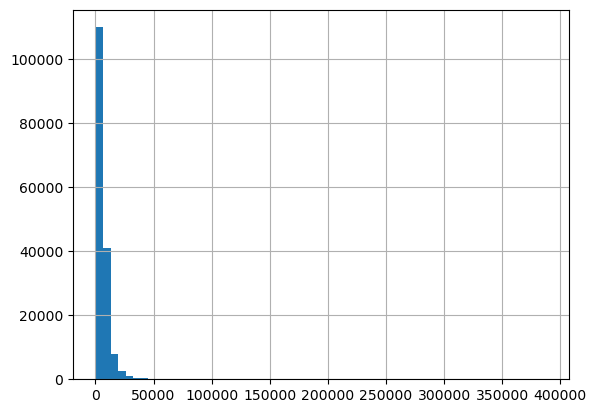

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
bin_width = 0.1
bins_aspect_ratio = np.arange(bbox_df['AspectRatio'].min(), bbox_df['AspectRatio'].max() + bin_width, bin_width)
bbox_df['AspectRatio'].hist(bins=bins_aspect_ratio)
plt.show() # what
bin_width = 50
bins_ar = np.arange(bbox_df['Area'].min(), bbox_df['Area'].max() + bin_width, bin_width)
bbox_df['Area'].hist(bins=60)

print("Median AspectRatio:", bbox_df['AspectRatio'].median())
print("Area median: ", bbox_df['Area'].median())

# Images dimensionality analysis

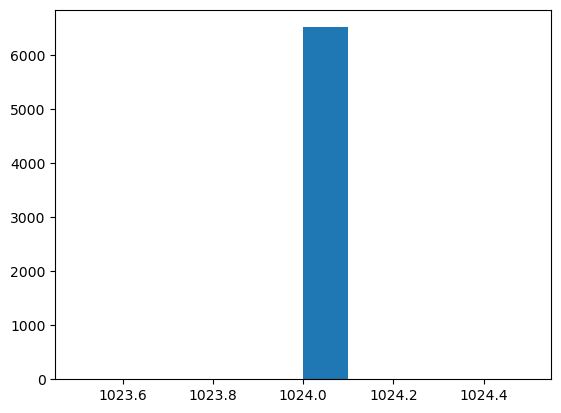

Max values: width - 1024, height - 1024
Min values: width - 1024, height - 1024


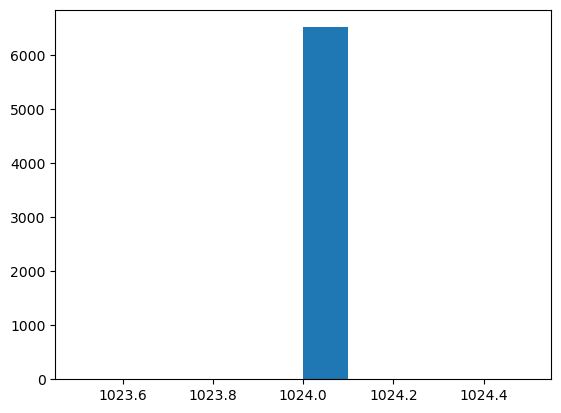

In [11]:
# Create a histogram of image sizes from the dataset
from PIL import Image
imgs_path = '/home/js/gwhd_2021/images'

img_widths = []
img_heights = []

for img_name in os.listdir(imgs_path):
    try:
        img_full_path = Image.open(os.path.join(imgs_path, img_name))
    except:
        print(f"Couldn't open {img_name}, skipping...")
        continue
    img_width, img_height = img_full_path.size
    img_widths.append(img_width)
    img_heights.append(img_height)

plt.hist(img_widths, bins=10)
plt.show() # ?
plt.hist(img_heights, bins=10)
print(f"Max values: width - {np.max(img_widths)}, height - {np.max(img_heights)}")
print(f"Min values: width - {np.min(img_widths)}, height - {np.min(img_heights)}")
